## California Housing Price Prediction

This is the start of makimg the basic housing price prediction model using real life data taken from california's housing plan. As per the reference from HOML-3

Lets begin...

In [1]:
import subprocess
import sys

library_imports = [
    "numpy",
    "matplotlib",
    "pandas",
    "scikit-learn"
]

def install_package(package):
    subprocess.run([sys.executable, "-m", "pip", "install", package])

def freeze_packages():
    with open("requirements.txt", "w") as req_file:
        subprocess.run([sys.executable, "-m", "pip", "freeze"], stdout=req_file)

for package in library_imports:
    install_package(package)

freeze_packages()


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url,tarball_path)
        with tarfile.open(tarball_path) as housing_dataset:
            housing_dataset.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

Generating housing info..

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


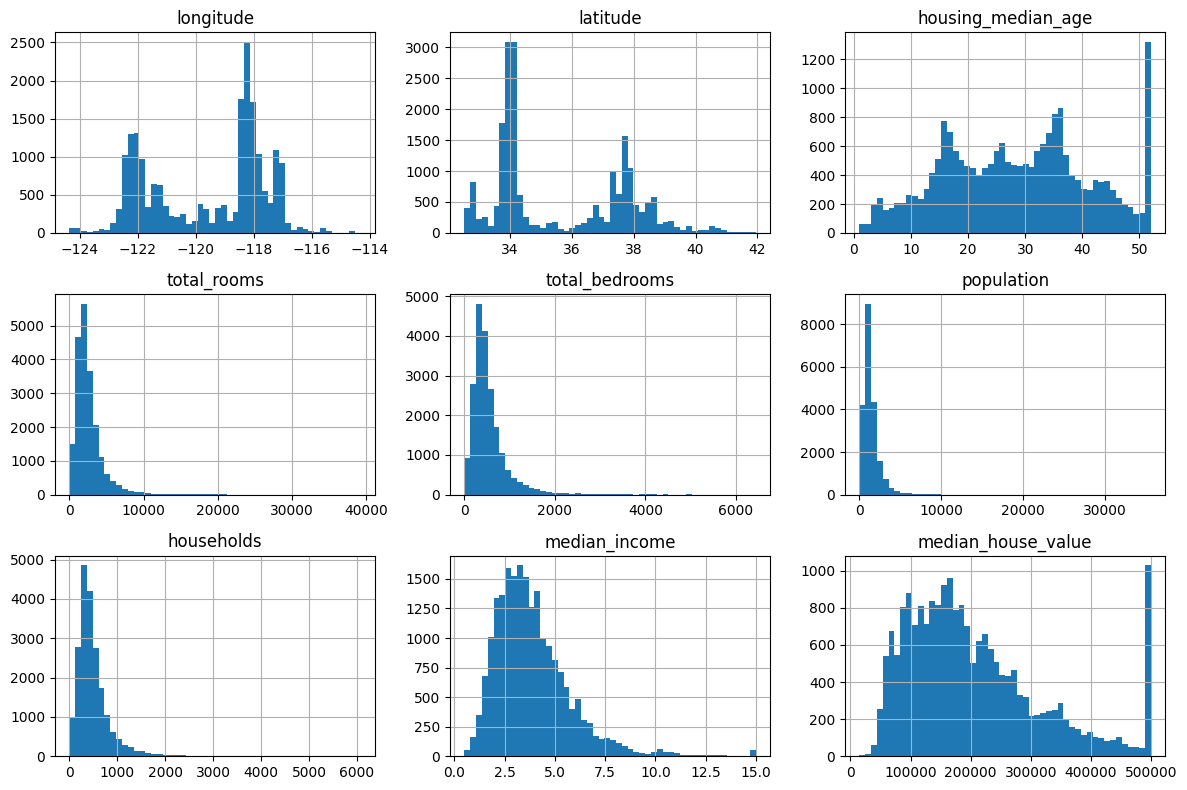

In [6]:
housing.hist(bins=50,figsize=(12,8))
save_fig("9X9 Histogram Chart")
plt.show()

## Create a Test Set

In [7]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [8]:
import numpy as np

def shufle_and_split(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))

    print(shuffled_indices)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices],data. iloc[test_indices]
 
# housing = pd.DataFrame([1,2,3,4,5,6])
train,test = shufle_and_split(housing,.2)

print("Total length: ",len(housing))
print("The Length of train:",len(train))
print("The Length of test:",len(test))

[13157  5737  9187 ...  7682  2702 12770]
Total length:  20640
The Length of train: 16512
The Length of test: 4128


In [9]:
# from zlib import crc32

# def is_id_in_test_set(val,set_ratio):
#     return crc32(np.int64(val)) < set_ratio * 2**32
    
# def splits_data_with_id(data,test_ratio,id_column):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id_:is_id_in_test_set(id_,test_ratio))
#     return data.loc[~in_test_set],data.loc[in_test_set]

# xy = housing.reset_index()
# train,test = splits_data_with_id(xy,0.2,"index") 

In [10]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(housing,test_size=0.2,random_state=42)

# Stratified Data Splitting

This process is used to split data based on their categories 

In [11]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


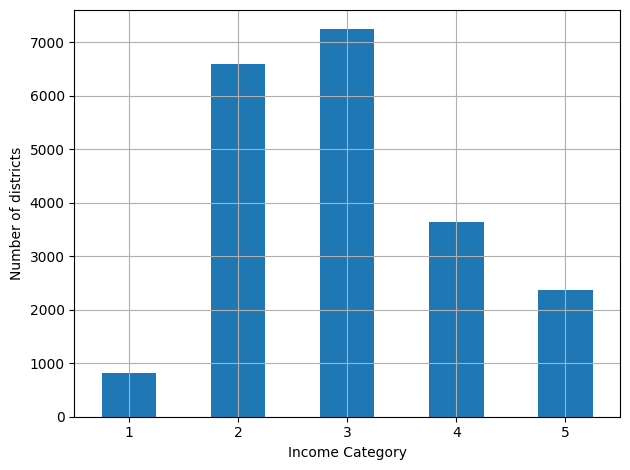

In [12]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0,1.5,3,4.5,6,np.inf],
                               labels=[1,2,3,4,5]
                               )

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
save_fig("Income categories")
plt.show()

Time for Stratified Shuffle Split based on income data

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits=[]
for train_index,test_index in splitter.split(housing,housing["income_cat"]):
    strat_train_split_n = housing.iloc[train_index]
    strat_test_split_n = housing.iloc[test_index]
    strat_splits.append([strat_train_split_n,strat_test_split_n])

but the above solution will give you 10 unique split of the same dataset, we can go for first element(split) [0]

or we can do it by one go

In [14]:
strat_train_set,strat_test_set = train_test_split(
    housing,
    test_size=0.2,
    random_state=42,
    stratify=housing["income_cat"])

In [15]:
income_prop = strat_test_set["income_cat"].value_counts()/len(strat_test_set)
income_prop

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [16]:
#extra codes -  for computing the data

def income_cat_proportions(data):
    return data["income_cat"].value_counts()/len(data)

train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

compare_props = pd.DataFrame({
    "Overall%":income_cat_proportions(housing),
    "Stratified%":income_cat_proportions(strat_test_set),
    "Random%":income_cat_proportions(test_set),            
}).sort_index()

compare_props.index.name = "Income Category"
compare_props["Strat. Error%"] = (compare_props["Stratified%"]/compare_props["Overall%"]-1)
compare_props["Rand. Error%"] = (compare_props["Random%"]/compare_props["Overall%"]-1)

(compare_props * 100).round(2)

,Overall%,Stratified%,Random%,Strat. Error%,Rand. Error%
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


Now, I should drop "income_cat" column since I wont be using it again and for short time, it gave us our purpose

In [17]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

# Discover and Visualize the Data to Gain Insights

In [18]:
housing = strat_train_set.copy()

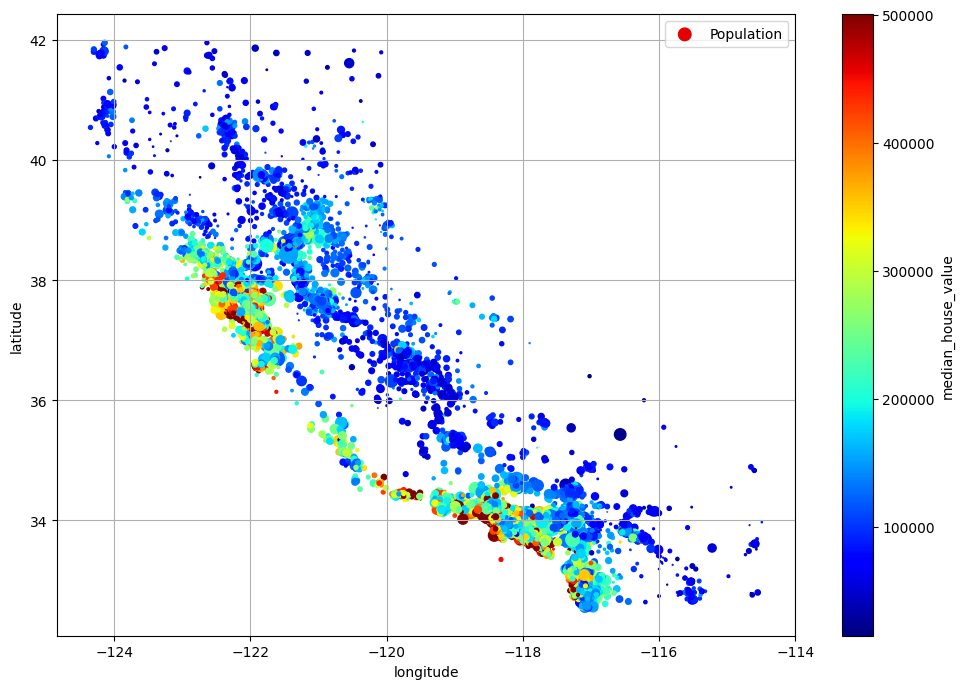

In [19]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    grid="True",
    s=housing["population"]/100,
    label="Population",
    c="median_house_value",
    cmap="jet",
    figsize=(10,7)
    )
save_fig("The spread file of california")
plt.show()

Now, we can do is perform standard correlations between every pair of attribute using the corr() method

In [20]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

Now lets go for visual correlatons (instead of going through entire 11 attributes, we are going for essential one)

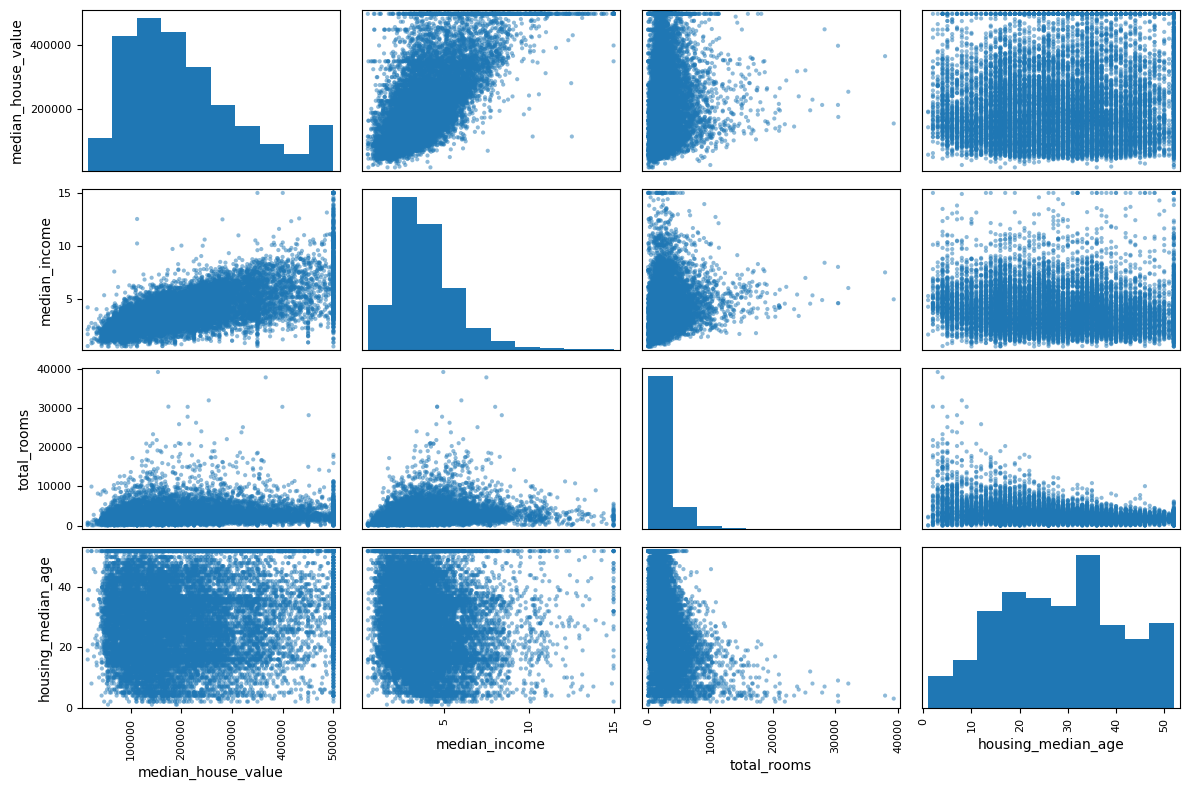

In [21]:
from pandas.plotting import scatter_matrix

attributes = [
    "median_house_value","median_income","total_rooms","housing_median_age"
    ]
scatter_matrix(housing[attributes], figsize=(12,8))
save_fig("Visual correlations")
plt.show()

we see that the plot in median_house_value x median_income looks promising since the plot is shown to be diagonal(close coefficient of correlation is **0.69** approx) 

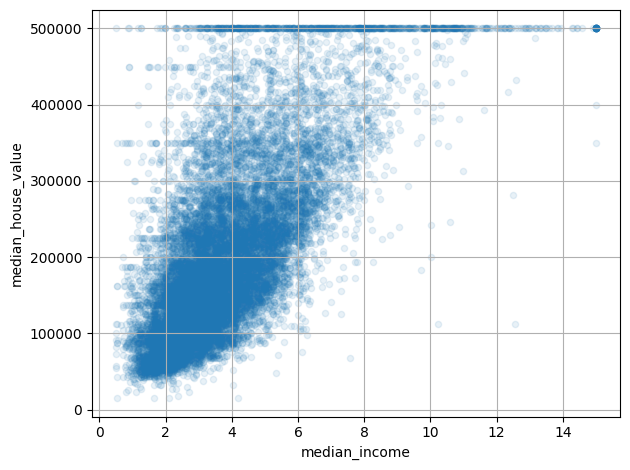

In [22]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1,grid=True)
save_fig("Median Income x Median House Value")
plt.show()

From here, what we are going o do is attribute combination, this process is for making deep analytics on the data, like having another attribute for, lets say, number of rooms per house, the bedroom ratio and number of people that are living per house etc.

The reason for this to check out which data shows promising correlations with eachother beyond the previous data

In [23]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [24]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

# Preparing data for Machine Learning algorithm



Let's revert to the original training set and separate the target (note that strat_train_set.drop() creates a copy of strat_train_set without the column, it doesn't actually modify strat_train_set itself, unless you pass inplace=True):


In [25]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [26]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Before we can proceed with it, we need to make a copy of the numerical data of the train set, i.e. **housing**

In [27]:
housing_num = housing.select_dtypes(include=[np.number])

now we clean up the data

In [28]:
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [29]:
X = imputer.transform(housing_num)

From here, we go with handling texts and categorical attributes.

In [30]:
#First of all, we should look at the categorical data
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


We could have gone for ordinal encoder since its a categorical features but we are not about to use it, do you know why? let me show you

In [31]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [32]:
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

These are the category labels that are made and now, look at this..

In [33]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Now, when you check this dataset and compare it with already encoded datas, you will see that the categories do not line up, NEAR BAY and  <1H OCEAN is encoded to 3 and 0 respectively, where as INLAND and NEAR OCEAN is encoded to 1 and 4, to make it simplify:

```[OCEAN,INLAND,ISLAND,<1H OCEAN,NEAR OCEAN] = [0,1,2,3,4]```

The problem with ML algorithms is that it will assume two nearby values are more similar than two distant values, for some cases, it can be fine, for example: good,better,best and excellent, but in this case, its different, it can be clearly seen seen that 0 and 4 are more similar than 0,1; thus we need to use another type of encoder.

In [34]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [35]:
housing.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND


# Feature Scaling and Transformation

In [36]:
# using Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
housing_num_min_max_scaler = min_max_scaler.fit_transform(housing_num)

In [37]:
# using Standard Scaler
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
housing_standard_scaler = standard_scaler.fit_transform(housing_num)

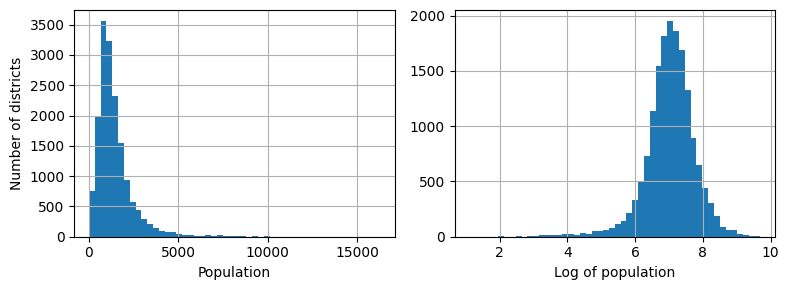

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
housing["population"].hist(ax=axs[0],bins=50)
housing["population"].apply(np.log).hist(ax=axs[1],bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")

In [39]:
housing_labels.to_frame()

,median_house_value
13096,458300.0
14973,483800.0
3785,101700.0
14689,96100.0
20507,361800.0
...,...
14207,500001.0
13105,88800.0
19301,148800.0
19121,500001.0


### Understanding the importance of `inverse_transformation()`

In [40]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()

# Using StandardScaler transformation
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

# getting the instance of LinearRegression
model = LinearRegression()

# Applying fit estimation
model.fit(housing[["median_income"]],scaled_labels)

# Generating new data
some_new_data = housing[["median_income"]].iloc[:5]

# Training the model
scaled_predictions = model.predict(some_new_data)

# Inverse transforming the scaled predictons
prediction = target_scaler.inverse_transform(scaled_predictions)

### Why we use `inverse_transform()` after prediction

When training the model, the target values (`housing_labels`) were scaled using `StandardScaler`, producing `scaled_labels`. The LinearRegression model learns a relationship in this scaled target space. Therefore, its predictions (`scaled_predictions`) are also returned in the scaled form.

To convert these predictions back to the original units of the target variable, we apply:

```python
prediction = target_scaler.inverse_transform(scaled_predictions)



---

### **Key takeaway**
✔ `inverse_transform()` reverses scaling using the scaler’s saved parameters  
✔ The model always works in whatever scale it was trained on  

---


In order to avoid manually scaling, theres a better version to that.

### Using `TransformedTargetRegressor` with `StandardScaler`

When we want to scale the target variable `y` (for example with `StandardScaler`), we can use `TransformedTargetRegressor` to automate both the forward transform during training and the inverse transform during prediction.




In [41]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())

model.fit(housing[["median_income"]],housing_labels)
predictions = model.predict(some_new_data)

## Custom Transformers

In [42]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log,inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

Silimarly, we can do the same with RBF Kernel

In [43]:
from sklearn.metrics.pairwise import rbf_kernel


rbf_transformer = FunctionTransformer(rbf_kernel,kw_args=dict(Y=[[35]],gamma=.1))

age_simi_35 = rbf_transformer.transform(housing[["housing_median_age"]])

Now, a Trainable transformer, that can learn some parameters in the `fit()` method an using them later in `transform()` method

In [44]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator,TransformerMixin):
    def __init__(self,n_clusters,gamma,random_state):
        self.n_clusters = n_clusters
        self.random_state =random_state
        self.gamma = gamma
    
    def fit(self,X,y=None,sample_weight=None):
        self.kmeans_=KMeans(self.n_clusters,random_state = self.random_state)
        self.kmeans_.fit(X,sample_weight=sample_weight)
        return self
    
    def transform(self,X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_,gamma=self.gamma)
    
    def get_feature_names_out(self,names=None):
        return [f"Cluster {i} Similarity" for i in range(self.n_clusters)]

Now we should see where it is implemented on

In [45]:
cluster_simil = ClusterSimilarity(n_clusters=10,gamma=1.,random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude","longitude"]], sample_weight=housing_labels)

In [46]:
similarities[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

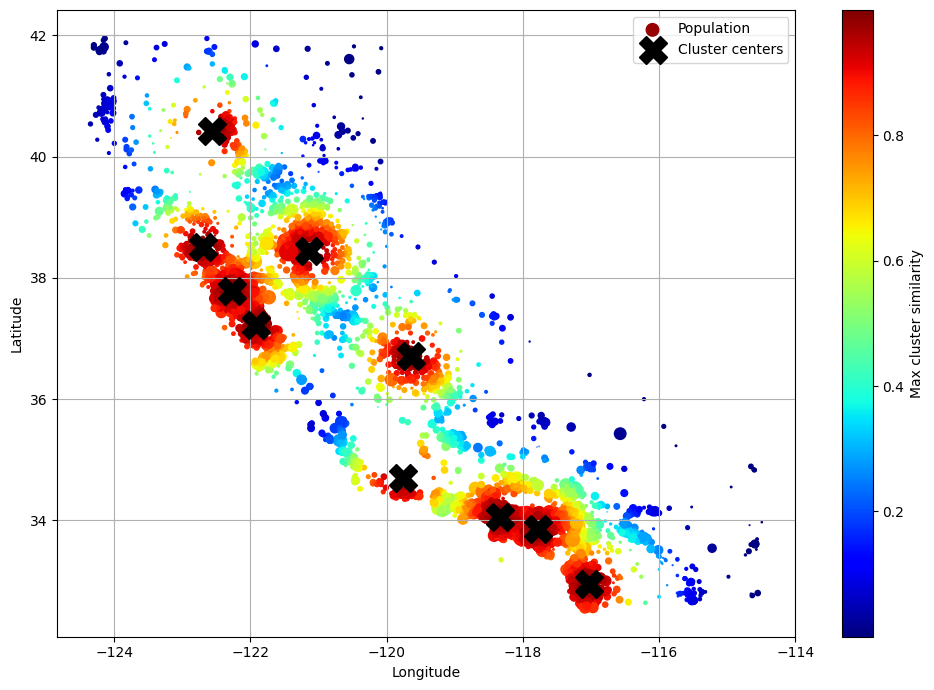

In [47]:
# extra code – this cell generates Figure 2–19

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()



## Transformation Pipeline

Now let's build a pipeline to preprocess the numerical attributes:

In [48]:
import sklearn
sklearn.set_config(display="diagram")
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ('standardize', StandardScaler())
])

In case we dont want to name the transformers, we can just use `make_pipeline`

In [49]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [50]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [51]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(),index=housing_num.index)
df_housing_num_prepared.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789


In [52]:
num_pipeline.named_steps

{'simpleimputer': SimpleImputer(strategy='median'),
 'standardscaler': StandardScaler()}

Now lets transform both numerical and categorical pipeline together

In [58]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]
cat_attribs = ["ocean_proximity"]

# just for reference
# num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

preprocessing1 = ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",cat_pipeline,cat_attribs)
])


lengthy process since I have to include column names separately

In [59]:

from sklearn.compose import make_column_selector,make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

# Now we are ready to apply this ColumnTransformer to the housing data
housing_prepared = preprocessing.fit_transform(housing)

In [60]:
housing_prepared_dataframe = pd.DataFrame(housing_prepared,columns=preprocessing.get_feature_names_out(), index=housing.index)
housing_prepared_dataframe.head(3)

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
